In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from functools import partial

In [4]:
%matplotlib widget

In [5]:
desired = pd.read_csv('path.csv')
actual = pd.read_csv('tracker.csv')

In [13]:
#Add overview of dfs
print(desired.info())
print(actual.info())
print(f"Num entries in tracker is {len(actual)/len(desired)} times larger than path")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145841 entries, 0 to 145840
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  145841 non-null  int64  
 1   index       145841 non-null  int64  
 2   x_pth       145841 non-null  float64
 3   y_pth       145841 non-null  float64
 4   z_pth       145841 non-null  float64
 5   t_pth       145841 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 6.7 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546943 entries, 0 to 546942
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  546943 non-null  int64  
 1   index       546943 non-null  int64  
 2   x_trk       546943 non-null  float64
 3   y_trk       546943 non-null  float64
 4   z_trk       546943 non-null  float64
 5   t_trk       546943 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 25.0 MB
No

In [ ]:
#what's in unnamed and index?
#max time, time step
#max movement for both dfs
#etc

In [7]:
START = 1
END = 100
SKIP = 5

In [8]:
def get_data_slices(df, start, end, skip):
    xdata = df[['x_pth']].iloc[start:end:skip]
    ydata = df[['y_pth']].iloc[start:end:skip]
    zdata = df[['z_pth']].iloc[start:end:skip]
    tdata = df[['t_pth']].iloc[start:end:skip]
    return xdata, ydata, zdata, tdata

def update_plot(slider, val):
    ind = int(slider.val)
    data_desired = get_data_slices(desired, START, ind, SKIP)
    data_actaul = get_data_slices(actual, START, ind, SKIP)
    ax3d.clear()
    ax3d.scatter3D(data_desired[0], data_desired[1], data_desired[2], c=data_desired[3], cmap='hsv')
    ax3d.scatter3D(data_actaul[0], data_actaul[1], data_actaul[2], c=data_actaul[3], cmap='hsv')
    fig.canvas.draw()

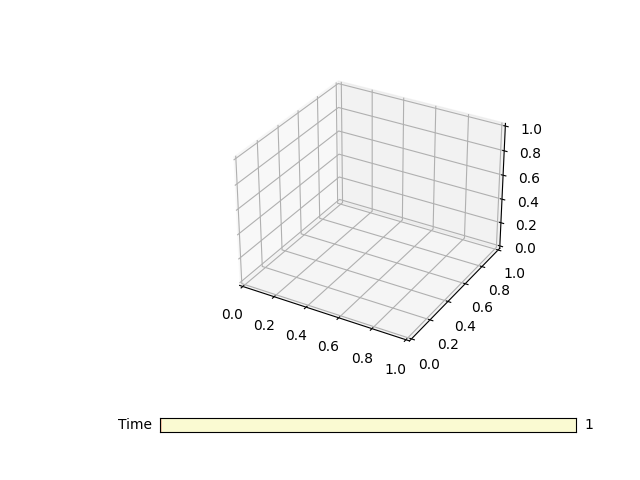

In [9]:
fig = plt.figure()
ax = plt.subplot(111, label='a')
fig.subplots_adjust(left=0.25, bottom=0.25)
ax3d = plt.axes(projection='3d', label='b')

tBias = desired[['t_pth']].iloc[0]
tdata = desired[['t_pth']].iloc[0:10000]
tDiff = tdata.diff().mean() #nanosec 0.25 sec sample rate
tEnd = (desired[['t_pth']].iloc[-1] - tBias) * 1e-9
maxSpeedX = desired[['x_pth']].diff().max()

qtdata = (tdata - tdata.iloc[0])/1e9

axcolor = 'lightgoldenrodyellow'
axfreq = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
slider = Slider(axfreq, 'Time', 1., tEnd.values[0], valinit=0, valstep=10)

slider.on_changed(partial(update_plot, slider))

plt.show()
